等价于正则化(regularization)

对绝对值较大的权重进行了限制,一定程度上可以避免过拟合

**高维线性回归**
生成数据

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("..")
import PyCode.PyTorch_Learn.d2lzh_pytorch as d2l

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

# 初始化模型参数
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#定义训练集和测试集
batch_size, num_epochs, lr = 1, 100, 0.003
dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)



def fit_and_plot_pytorch(wd):
    net = nn.Linear(num_inputs, 1);
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd)
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)

    train_ls, test_ls = [], []
    loss = nn.MSELoss()
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X), y)
            optimizer_b.zero_grad()
            optimizer_w.zero_grad()
            l.backward()

            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())





无正则项时

L2 norm of w: 14.43082046508789


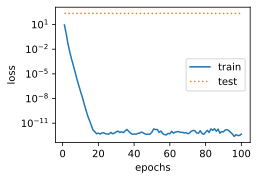

In [2]:
fit_and_plot_pytorch(0)




正则项为3时

L2 norm of w: 0.0755583643913269


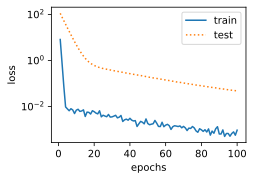

In [3]:
fit_and_plot_pytorch(3)